In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

#Load road shapefile 
"""Update shapefile under the nz_road to inlcude the crs information"""
road_data = gpd.read_file('nz-roads-road-section-geometry.shp')

None


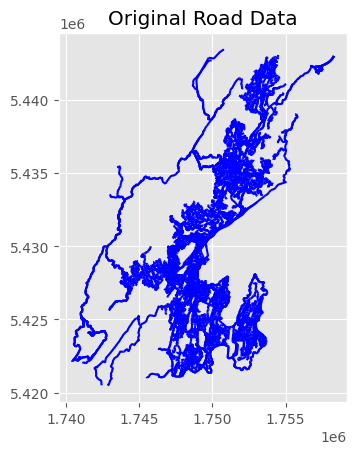

In [2]:
# Check the CRS of the crash data
#print(crash_data.crs)
print(road_data.crs)
# Plot the original road data
road_data.plot(color='blue', ax=plt.gca())
plt.title('Original Road Data')

plt.show()

In [3]:
# Load the CSV file with all the car crash data, this is for validation
cas_data = pd.read_csv('Crash_Analysis_System_(CAS)_data.csv')

# Print the first few rows of the data
cas_data.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1.561971e+06,5.176725e+06,66388959,NaN,587702.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1.756263e+06,5.927631e+06,66388960,NaN,507900.0,0.0,NaN,1.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1.755375e+06,5.912110e+06,66388961,NaN,518701.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
3,1.760027e+06,5.436020e+06,66388962,NaN,569100.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
4,2.032005e+06,5.708227e+06,66388963,NaN,544002.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Open,1.0,NaN,NaN,Light rain,Null


In [4]:
cas_data['region'].value_counts()

region
Auckland Region              294961
Waikato Region                91797
Canterbury Region             85376
Wellington Region             82639
Bay of Plenty Region          49287
Manawatū-Whanganui Region     48452
Otago Region                  46193
Northland Region              34910
Hawke's Bay Region            33585
Southland Region              20985
Taranaki Region               19453
Gisborne Region               10235
Marlborough Region             8573
Nelson Region                  8351
Tasman Region                  7898
West Coast Region              7529
Name: count, dtype: int64

In [5]:
## Get the data for the Wellington Region in the last 10 years
well_df = cas_data[(cas_data['region'] == 'Wellington Region')&(cas_data['crashYear'] > 2014)]
well_df.shape

(30464, 72)

In [6]:
# Load the car crash dataset from the GeoJSON file, this only includes the Wellington Region in last 10 years
well_crash_gdf = gpd.read_file('wellington_crash.geojson')
# Ensure the CRS matches for both datasets
well_crash_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
print(well_crash_gdf.shape)
print(well_crash_gdf.shape[0] == well_df.shape[0])
well_crash_gdf.head()

(12291, 71)
False


,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,...,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,geometry
0,66388986,NaN,575300,0.0,0.0,0.0,1.0,1.0,South,2018/2019,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Light rain,Null,POINT (174.7576 -41.28854)
1,66388998,NaN,572600,0.0,0.0,0.0,2.0,0.0,North,2017/2018,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null,POINT (174.82511 -41.16802)
2,66389034,NaN,577000,0.0,NaN,0.0,1.0,NaN,South,2019/2020,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.81144 -41.3266)
3,66389036,NaN,576800,0.0,NaN,0.0,0.0,NaN,East,2018/2019,...,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Light rain,Null,POINT (174.79145 -41.30418)
4,66389128,NaN,572900,0.0,NaN,0.0,2.0,NaN,Null,2017/2018,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.77253 -41.27599)


In [8]:
# Load the TA GeoJSON file from stats NZ, this is used for validation boundary.
ta_gdf = gpd.read_file('nz_ta.geojson')
# Ensure the CRS matches for both datasets
ta_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# Load the TA GeoJSON file from stats NZ, this is used for validation boundary.
ta_gdf = gpd.read_file('nz_ta.geojson')
# Ensure the CRS matches for both datasets
ta_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

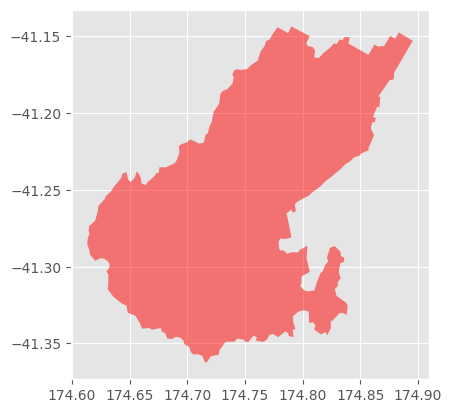

In [10]:
well_gdf = ta_gdf[ta_gdf['TA2016_NAM'] == 'Wellington City']
# Plot the Wellington boundary and the filtered crash data
fig, ax = plt.subplots()
well_gdf.plot(color='red', ax=ax, alpha=0.5)

plt.show()

In [11]:
## filter the car crash data to only include the crash in wellington city boundary
crash_within_boundary = well_crash_gdf[well_crash_gdf.geometry.intersects(well_gdf.unary_union)]
crash_within_boundary.shape

/tmp/ipykernel_3898006/3913958329.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  crash_within_boundary = well_crash_gdf[well_crash_gdf.geometry.intersects(well_gdf.unary_union)]


(12291, 71)

In [12]:
crash_within_boundary.head()

,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,...,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,geometry
0,66388986,NaN,575300,0.0,0.0,0.0,1.0,1.0,South,2018/2019,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Light rain,Null,POINT (174.7576 -41.28854)
1,66388998,NaN,572600,0.0,0.0,0.0,2.0,0.0,North,2017/2018,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null,POINT (174.82511 -41.16802)
2,66389034,NaN,577000,0.0,NaN,0.0,1.0,NaN,South,2019/2020,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.81144 -41.3266)
3,66389036,NaN,576800,0.0,NaN,0.0,0.0,NaN,East,2018/2019,...,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Light rain,Null,POINT (174.79145 -41.30418)
4,66389128,NaN,572900,0.0,NaN,0.0,2.0,NaN,Null,2017/2018,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.77253 -41.27599)


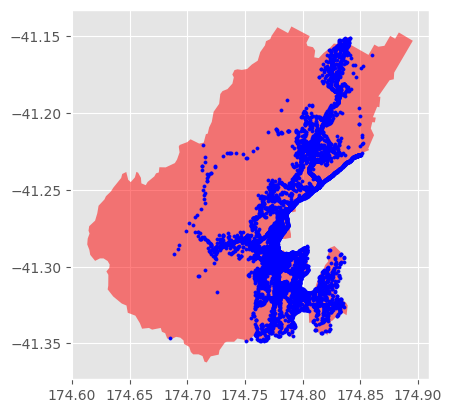

In [13]:
# Plot the Wellington boundary and the filtered crash data
fig, ax = plt.subplots()
well_gdf.plot(color='red', ax=ax, alpha=0.5)
crash_within_boundary.plot(ax=ax, color='blue', markersize=5)

plt.show()

/tmp/ipykernel_3898006/2808353604.py:9: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  road_within_wellington = road_data[road_data.geometry.intersects(well_gdf.unary_union)]
/tmp/ipykernel_3898006/2808353604.py:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


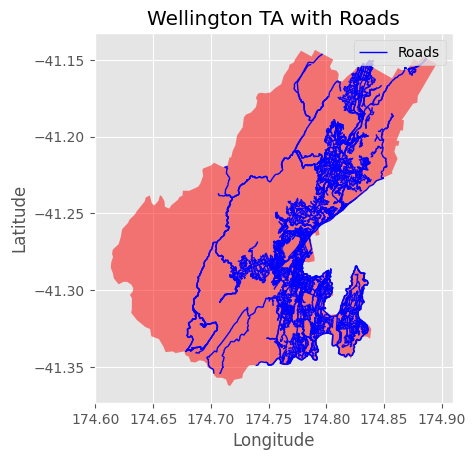

In [14]:
# Check if road_data has a CRS
if road_data.crs is None:
    road_data.crs = 'EPSG:2193'  # Replace XXXX with the correct EPSG code

# Now you can transform road_data to match well_gdf's CRS
road_data = road_data.to_crs(well_gdf.crs)

# Filter road_data to keep only the lines within well_gdf
road_within_wellington = road_data[road_data.geometry.intersects(well_gdf.unary_union)]

# Plotting the data
ax = well_gdf.plot(color='red', ax=plt.gca(), alpha=0.5, label='Wellington Boundary')
road_within_wellington.plot(ax=ax, color='blue', linewidth=1, label='Roads')

plt.title('Wellington TA with Roads')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


## Check data distribution
- make decision for how many years data to cover to have enough data points
- whether to include pandemic years(2020-2021)

In [15]:
crash_within_boundary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12291 entries, 0 to 12290
Data columns (total 71 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID                   12291 non-null  int32   
 1   advisorySpeed              151 non-null    float64 
 2   areaUnitID                 12291 non-null  int32   
 3   bicycle                    12291 non-null  float64 
 4   bridge                     4979 non-null   float64 
 5   bus                        12291 non-null  float64 
 6   carStationWagon            12291 non-null  float64 
 7   cliffBank                  4979 non-null   float64 
 8   crashDirectionDescription  12291 non-null  object  
 9   crashFinancialYear         12291 non-null  object  
 10  crashLocation1             12291 non-null  object  
 11  crashLocation2             12254 non-null  object  
 12  crashRoadSideRoad          0 non-null      object  
 13  crashSeverity          

In [16]:
# drop the geometry column to create a pandas dataframe
well_update_df = crash_within_boundary.drop(columns='geometry')
print(type(well_update_df))

# Create a new column to indicate if the crashYear is during the pandemic
well_update_df['if_pandemic'] = well_update_df['crashYear'].apply(lambda x: 1 if x in [2020, 2021] else 0)
well_update_df['crashYear'] = well_update_df['crashYear'].astype(int)
well_update_df.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12291 entries, 0 to 12290
Data columns (total 71 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OBJECTID                   12291 non-null  int32  
 1   advisorySpeed              151 non-null    float64
 2   areaUnitID                 12291 non-null  int32  
 3   bicycle                    12291 non-null  float64
 4   bridge                     4979 non-null   float64
 5   bus                        12291 non-null  float64
 6   carStationWagon            12291 non-null  float64
 7   cliffBank                  4979 non-null   float64
 8   crashDirectionDescription  12291 non-null  object 
 9   crashFinancialYear         12291 non-null  object 
 10  crashLocation1             12291 non-null  object 
 11  crashLocation2             12254 non-null  object 
 12  crashRoadSideRoad          0 non-null      object 
 13  crashSev

In [17]:
# Create a pivot table to count each year by crashSeverity
pivot_table = well_update_df.pivot_table(index='crashYear', columns='crashSeverity', aggfunc='size', fill_value=0)
pivot_table

crashSeverity,Fatal Crash,Minor Crash,Non-Injury Crash,Serious Crash
crashYear,,,,
2015,3,244,945,44
2016,2,268,1191,61
2017,1,330,1271,79
2018,4,341,1175,74
2019,1,336,1108,69
2020,4,243,983,49
2021,5,285,1020,62
2022,4,233,700,58
2023,3,288,635,48


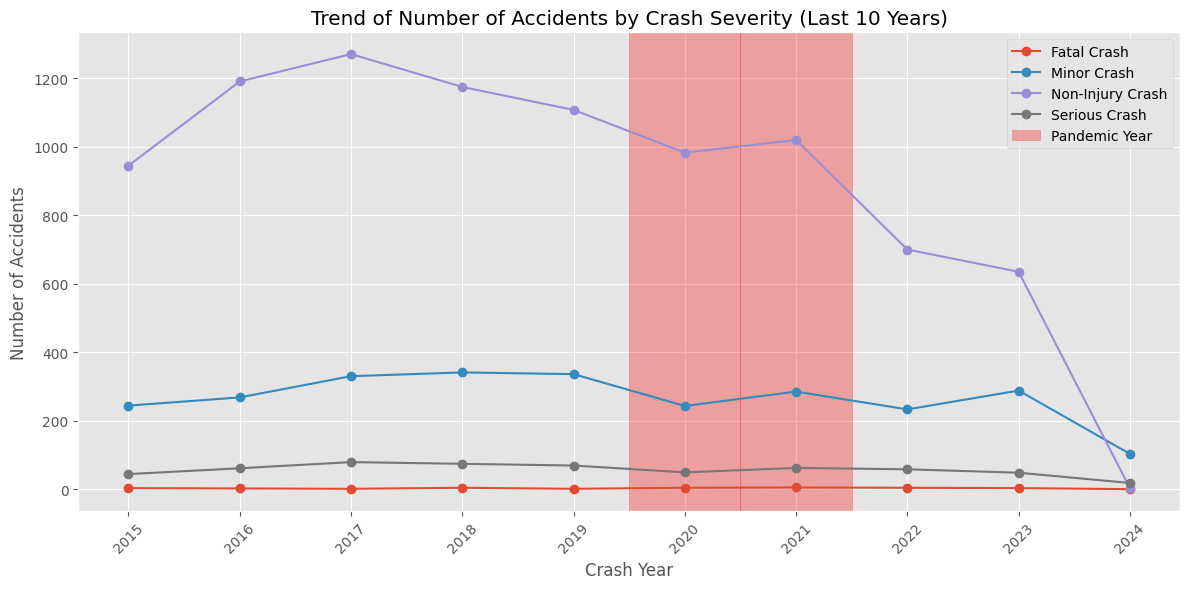

In [18]:

# Plot the trend of the number of accidents in each crashSeverity
plt.figure(figsize=(12, 6))
for severity in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[severity], marker='o', label=severity)

# Highlight the pandemic years
for year in [2020, 2021]:
    plt.axvspan(year - 0.5, year + 0.5, color='red', alpha=0.3, label='Pandemic Year' if year == 2020 else "")

plt.xlabel('Crash Year')
plt.ylabel('Number of Accidents')
plt.title('Trend of Number of Accidents by Crash Severity (Last 10 Years)')
plt.legend()
plt.xticks(pivot_table.index, rotation=45)
plt.tight_layout()
plt.show()

/opt/miniconda/lib/python3.11/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.4)
  from scipy.stats import gaussian_kde


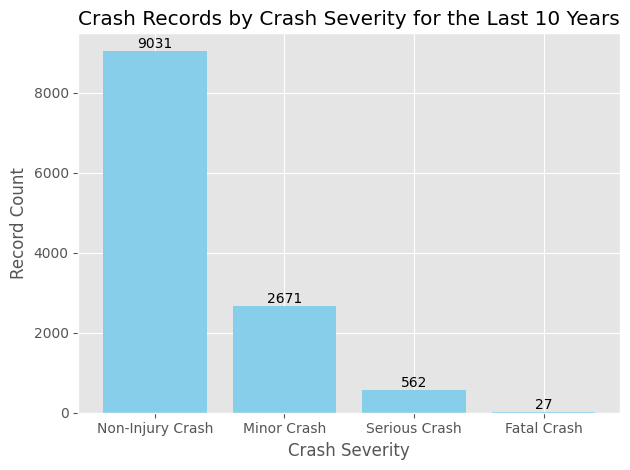

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Sum the records by crashSeverity
severity_sum = well_update_df.groupby('crashSeverity').size().reset_index(name='count')

# Define the desired order of crashSeverity
severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']
severity_sum['crashSeverity'] = pd.Categorical(severity_sum['crashSeverity'], categories=severity_order, ordered=True)
severity_sum = severity_sum.sort_values('crashSeverity')

# Plot a histogram (bar plot) of the summed records
plt.bar(severity_sum['crashSeverity'], severity_sum['count'], color='skyblue')

# Add count numbers on the bars
for index, value in enumerate(severity_sum['count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Crash Severity')
plt.ylabel('Record Count')
plt.title('Crash Records by Crash Severity for the Last 10 Years')
# plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [20]:
import geopandas as gpd

# Load the GeoJSON data
gdf = gpd.read_file('wellington_crash.geojson')

# Check the first few rows and the CRS
print(gdf.head())
print(gdf.crs)


   OBJECTID  advisorySpeed  areaUnitID  bicycle  bridge  bus  carStationWagon  \
0  66388986            NaN      575300      0.0     0.0  0.0              1.0   
1  66388998            NaN      572600      0.0     0.0  0.0              2.0   
2  66389034            NaN      577000      0.0     NaN  0.0              1.0   
3  66389036            NaN      576800      0.0     NaN  0.0              0.0   
4  66389128            NaN      572900      0.0     NaN  0.0              2.0   

   cliffBank crashDirectionDescription crashFinancialYear  ... tree truck  \
0        1.0                     South          2018/2019  ...  0.0   0.0   
1        0.0                     North          2017/2018  ...  0.0   0.0   
2        NaN                     South          2019/2020  ...  NaN   0.0   
3        NaN                      East          2018/2019  ...  NaN   0.0   
4        NaN                      Null          2017/2018  ...  NaN   0.0   

  unknownVehicleType  urban vanOrUtility  vehicle 

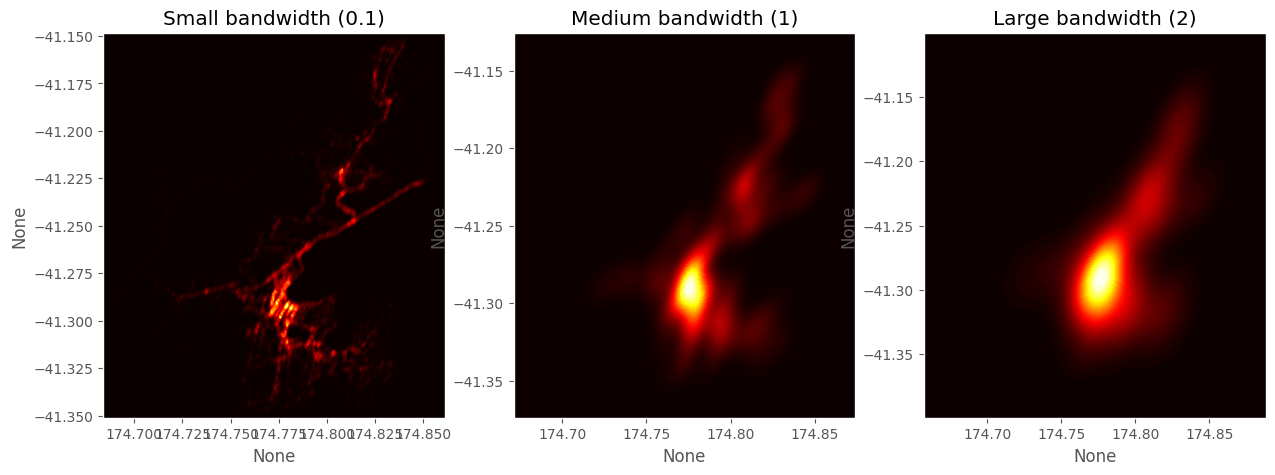

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the coordinates
x = gdf.geometry.x
y = gdf.geometry.y

# Create a 2D histogram for KDE with different bandwidths
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(x=x, y=y, fill=True, thresh=0, levels=50, cmap='hot', ax=axs[0], bw_adjust=0.1)
axs[0].set_title('Small bandwidth (0.1)')

sns.kdeplot(x=x, y=y, fill=True, thresh=0, levels=50, cmap='hot', ax=axs[1], bw_adjust=1)
axs[1].set_title('Medium bandwidth (1)')

sns.kdeplot(x=x, y=y, fill=True, thresh=0, levels=50, cmap='hot', ax=axs[2], bw_adjust=2)
axs[2].set_title('Large bandwidth (2)')

plt.show()

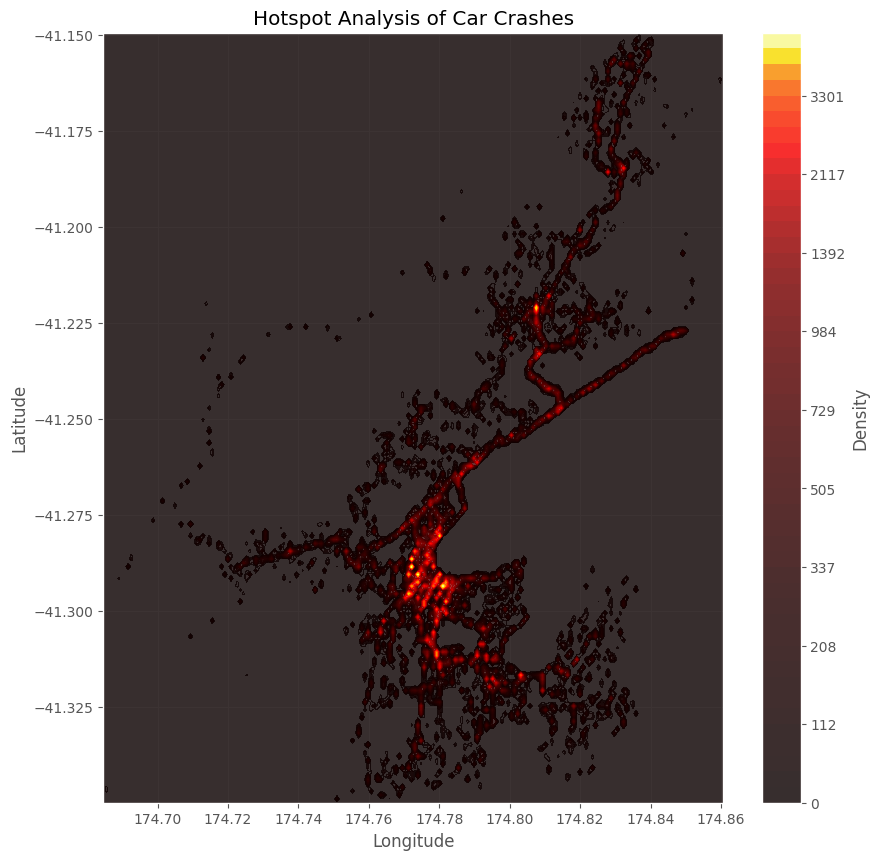

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the coordinates
x = gdf.geometry.x
y = gdf.geometry.y

# Create a 2D histogram for KDE
fig, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(x=x, y=y, fill=True, thresh=0, levels=50, cmap='hot', alpha=0.8, ax=ax, bw_adjust=0.05)
plt.title('Hotspot Analysis of Car Crashes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(ax.collections[0], label='Density', ax=ax)
plt.show()

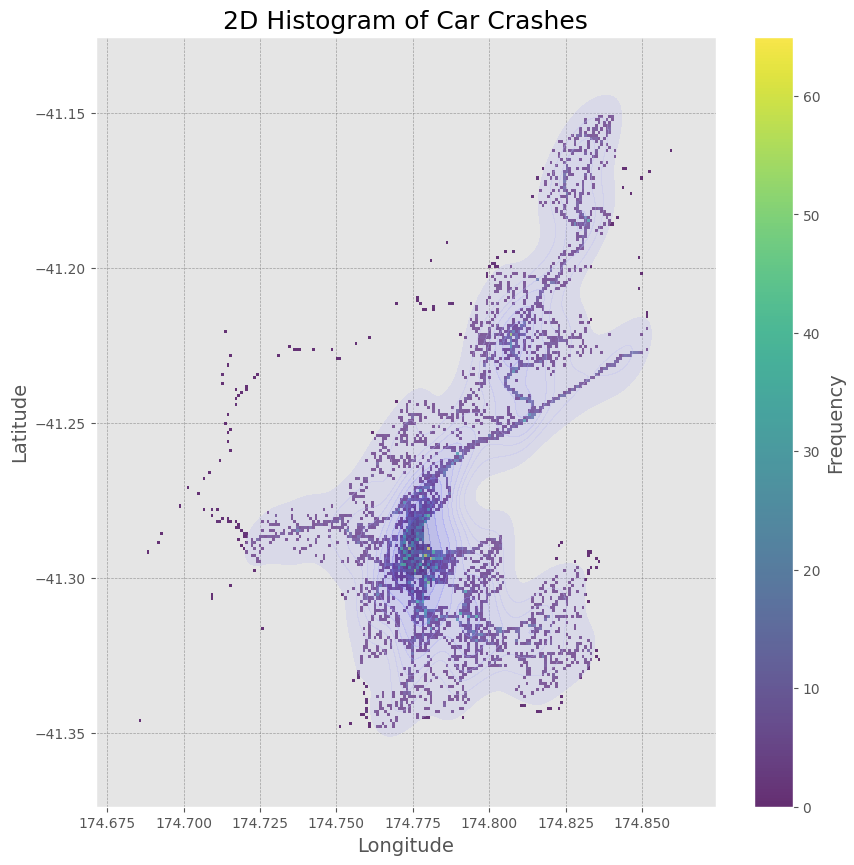

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the coordinates
x = gdf.geometry.x
y = gdf.geometry.y

# Create a 2D histogram
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(x=x, y=y, bins=200, cmap='viridis', alpha=0.8, ax=ax)

# Add contour plot for better visualization
sns.kdeplot(x=x, y=y, ax=ax, color='blue', fill=True, alpha=0.3)

# Add titles and labels
plt.title('2D Histogram of Car Crashes', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Add a color bar
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Frequency', fontsize=14)

# Set limits if known
# ax.set_xlim([min_longitude, max_longitude])
# ax.set_ylim([min_latitude, max_latitude])

# Customize grid
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure if desired
# plt.savefig('car_crash_2d_histogram.png', dpi=300, bbox_inches='tight')

plt.show()


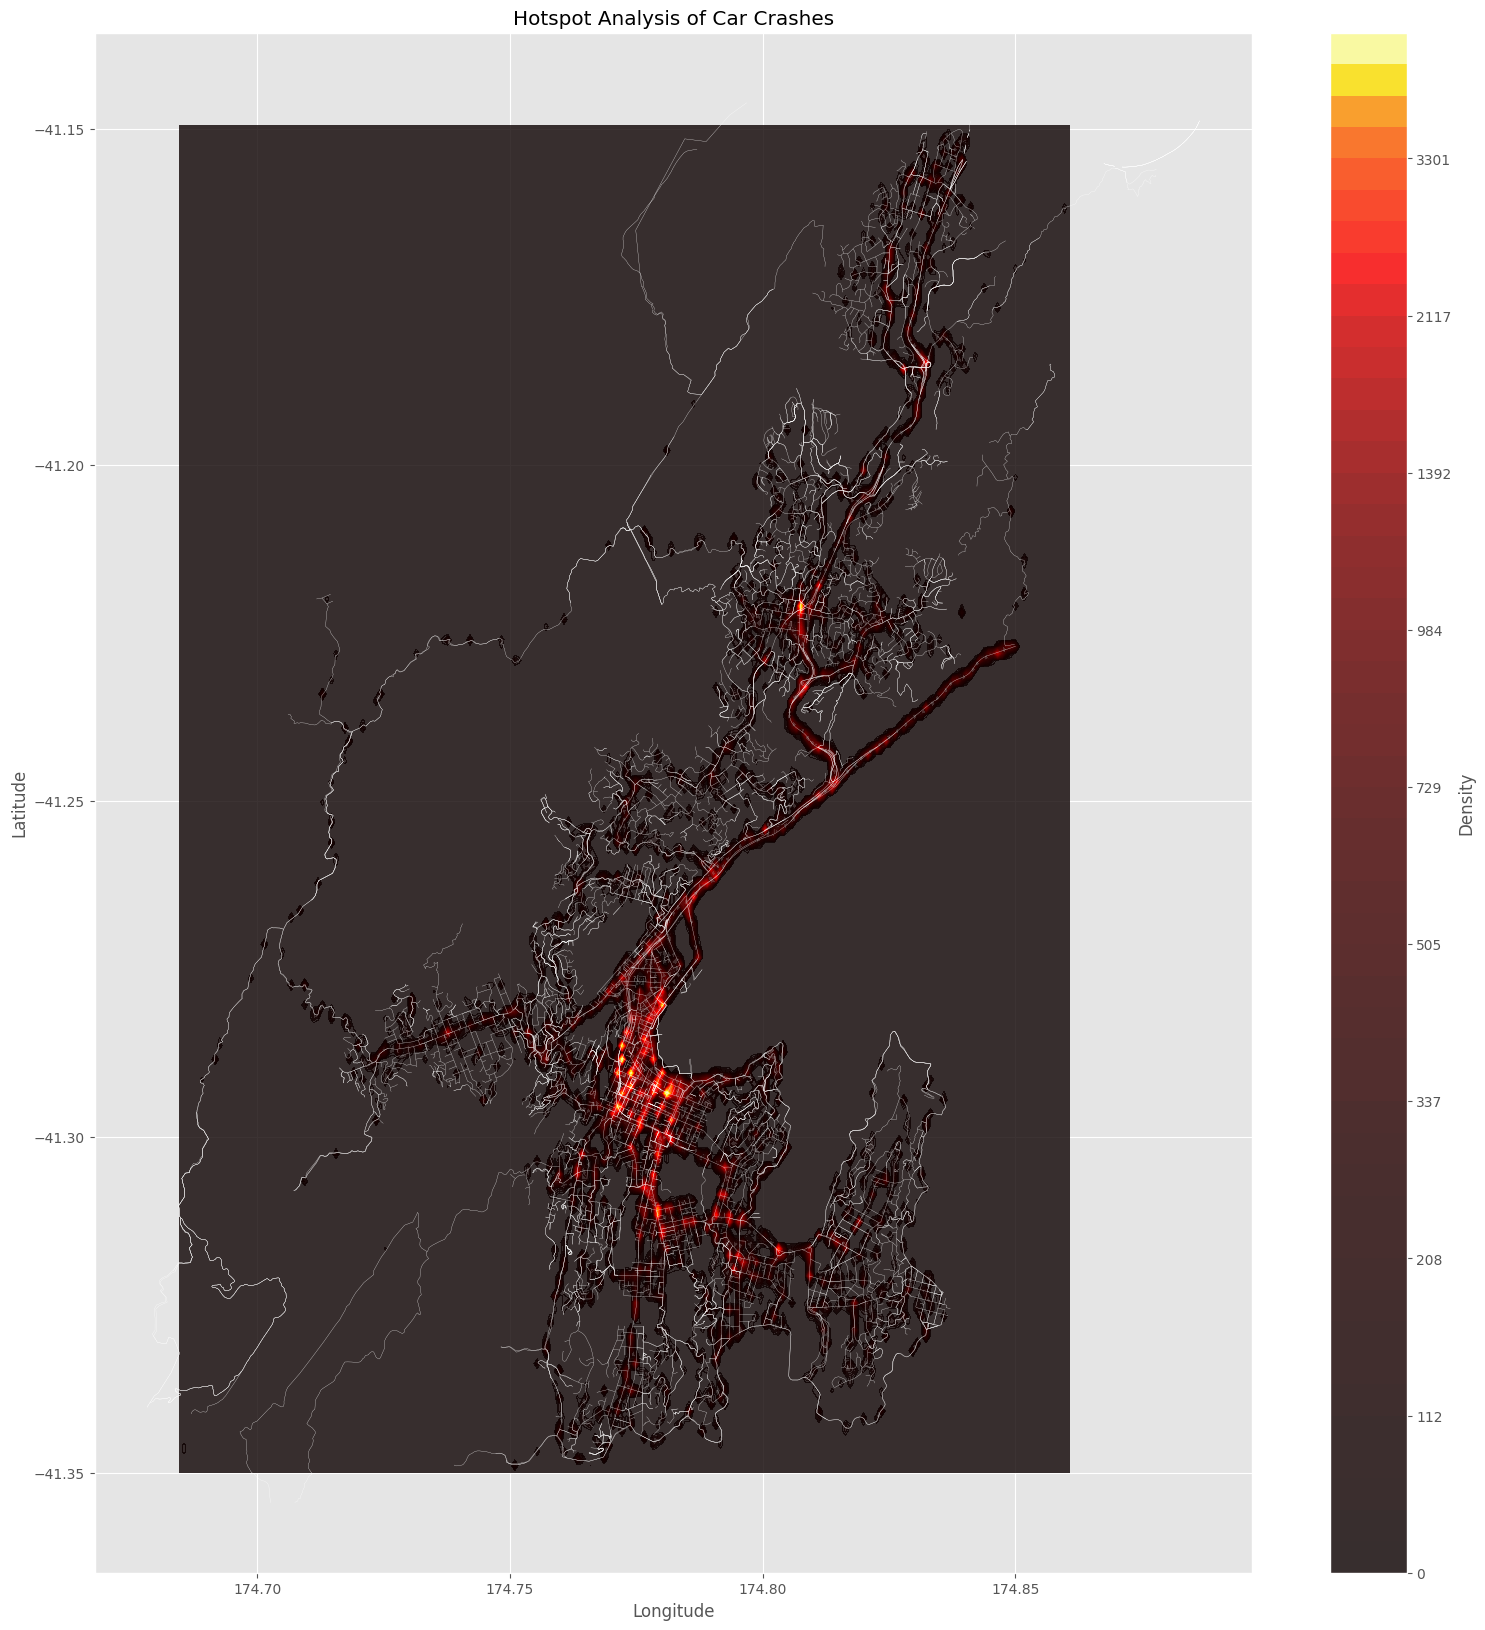

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the coordinates
x = gdf.geometry.x
y = gdf.geometry.y

# Create a 2D histogram for KDE
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the road data in grey
road_data.plot(ax=ax, color='white', linewidth=0.2)

# Plot the KDE heatmap on top of the roads
sns.kdeplot(x=x, y=y, fill=True, thresh=0, levels=50, cmap='hot', alpha=0.8, ax=ax, bw_adjust=0.05)

plt.title('Hotspot Analysis of Car Crashes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(ax.collections[1], label='Density', ax=ax)
plt.show()

In [32]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Load the GeoJSON data
gdf = gpd.read_file('wellington_crash.geojson')

# Convert to WGS84 (EPSG:4326) if necessary
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs(epsg=4326)

# Prepare data for HeatMap
heat_data = [[point.y, point.x] for point in gdf.geometry]

# Create a base map
m = folium.Map(location=[-41.2865, 174.7762], zoom_start=12)

# Create a HeatMap layer with customized parameters
HeatMap(
    heat_data,
    radius=10,    # Adjust the radius
    blur=8,      # Adjust the blur
    max_val=10,   # Set maximum intensity value
    min_opacity=0.5  # Set minimum opacity for the heatmap
).add_to(m)

/tmp/ipykernel_3898006/4180238735.py:19: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


In [45]:
# Import the pandas library
import pandas as pd

# Load the CSV file
SA2_data = pd.read_csv('statistical-area-2-2023-generalised.shx')

# Verify the data
SA2_data.head()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 28: invalid continuation byte

In [39]:
places_to_clip = [
    'Oriental Bay',
    'Wellington Central',
    'Tawa Central',
    'Dixon Street East',
    'Newtown South',
    'Hataitai North East',
    'Makara-Ohariu',
    'Wadestown',
    'Thorndon North',
    'Karori South',
    'Grenada Village',
    'Miramar South',
    'Glenside-Churton Park East',
    'Karori West',
    'Miramar Central',
    'Southgate',
    'Strathmore (Wellington City)',
    'Vivian West',
    'Churton Park North',
    'Newlands South',
    'Kingston-Mornington-Vogeltown',
    'Miramar North',
    'Evans Bay',
    'Crofton Downs',
    'Mount Cook North',
    'Island Bay East',
    'Northland (Wellington City)',
    'Thorndon South',
    'Berhampore',
    'Maupuia',
    'Vivian East',
    'Melrose',
    'Johnsonville West',
    'Newlands North',
    'Broadmeadows',
    'Aro Valley',
    'Kelburn',
    'Linden',
    'Woodridge',
    'Wellington University',
    'Paparangi',
    'Johnsonville Central',
    'Kilbirnie Central',
    'Karaka Bay-Worser Bay',
    'Dixon Street West',
    'Rongotai',
    'Newlands East',
    'Owhiro Bay',
    'Pauatahanui',
    'Cannons Creek South',
    'Roseneath',
    'Island Bay West',
    'Churton Park South',
    'Karori North',
    'Onslow',
    'Wilton',
    'Karori Park',
    'Hataitai North West',
    'Newtown North',
    'Hataitai South',
    'Brooklyn East',
    'Tawa South',
    'Mount Cook South',
    'Khandallah Reserve',
    'Takapu-Horokiwi',
    'Brooklyn North',
    'Grenada North',
    'Pipitea-Kaiwharawhara',
    'Khandallah South',
    'Seatoun',
    'Houghton Bay',
    'Ngaio South',
    'Mount Victoria South',
    'Miramar East',
    'Tawa North',
    'Mount Cook East',
    'Mount Victoria North',
    'Newtown West',
    'Courtenay',
    'Kilbirnie East',
    'Ngaio North',
    'Karori East',
    'Brooklyn South',
    'Khandallah North',
    'Ranui Heights',
    'Johnsonville South',
    'Wellington Botanic Gardens',
    'Johnsonville North',
    'Lyall Bay',
    'Mākara-Ohariu',
    'Ōwhiro Bay'
]

mask = SA2_data['SA22023_V1_00_NAME'].isin(places_to_clip)
well_clipped_data = SA2_data[mask]

In [40]:
well_clipped_data.head()

,WKT,SA22023_V1_00,SA22023_V1_00_NAME,SA22023_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length
445,"POLYGON ((1750792.5583 5443461.0436,1751417.33...",247501,Mākara-Ohariu,Makara-Ohariu,177.199011,177.199011,97243.575469
446,"POLYGON ((1744316.0475 5427682.1197,1744293.26...",249401,Karori Park,Karori Park,1.157042,1.157042,6825.126776
447,"POLYGON ((1746905.3313 5428679.5811,1746901.35...",250600,Karori East,Karori East,1.229162,1.229162,6088.859722
448,"POLYGON ((1750593.6296 5427486.6101,1750549.03...",252300,Oriental Bay,Oriental Bay,0.303089,0.334971,3892.962277
449,"POLYGON ((1749502.518 5423294.7162,1749465.873...",253600,Newtown South,Newtown South,1.195096,1.195096,5413.914197


In [41]:
well_clipped_data.loc[:, 'geometry'] = well_clipped_data['WKT'].apply(parse_wkt)

NameError: name 'parse_wkt' is not defined

In [42]:
well_clipped_gdf = gpd.GeoDataFrame(well_clipped_data, geometry='geometry')

ValueError: Unknown column geometry

In [43]:
well_clipped_gdf.plot()

NameError: name 'well_clipped_gdf' is not defined

In [ ]:
well_clipped_gdf.to_file('well_clipped.shp', driver='ESRI Shapefile')

In [ ]:

crash_within_boundary.head()

In [ ]:
crash_within_boundary.crs = 'EPSG:2193'  # or whatever the correct CRS is
well_clipped_gdf.crs = 'EPSG:2193'  # or whatever the correct CRS is

In [ ]:
well_clipped_gdf.plot()

In [ ]:
well_clipped_gdf.to_file('wellington_EDSA_file.shp', driver='ESRI Shapefile')

In [ ]:
crash_within_boundary.plot()

In [ ]:
crash_within_boundary.to_file('well_EDSA_crashes.shp', driver='ESRI Shapefile')